
自动求导: 自动微分
===================================

PyTorch 中所有神经网络的核心是 ``autograd`` 自动求导包.
我们先来简单介绍一下, 然后我们会去训练我们的第一个神经网络.


``autograd`` 自动求导包针对张量上的所有操作都提供了自动微分操作.
这是一个逐个运行的框架, 这意味着您的反向传播是由您的代码如何运行来定义的, 每个单一的迭代都可以不一样.

让我们用一些更简单的术语与例子来了解这些套路.

Variable（变量）
--------

``autograd.Variable`` 是包的核心类.
它包装了张量, 并且支持几乎所有的操作.
一旦你完成了你的计算, 你就可以调用 ``.backward()`` 方法, 然后所有的梯度计算会自动进行.

你还可以通过 ``.data`` 属性来访问原始的张量, 而关于该 variable（变量）的梯度会被累计到 ``.grad`` 上去.

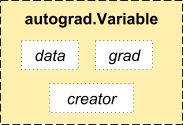

还有一个针对自动求导实现来说非常重要的类 - ``Function``.

``Variable`` 和 ``Function`` 是相互联系的, 并且它们构建了一个非循环的图, 编码了一个完整的计算历史信息.
每一个 variable（变量）都有一个 ``.grad_fn`` 属性,  它引用了一个已经创建了 ``Variable`` 的 ``Function`` （除了用户创建的  ``Variable `` 之外 - 它们的 ``grad_fn is None`` ）.

如果你想计算导数, 你可以在 ``Variable`` 上调用 ``.backward()`` 方法.
如果 ``Variable`` 是标量的形式（例如, 它包含一个元素数据）, 你不必指定任何参数给 ``backward()``,
但是, 如果它有更多的元素. 你需要去指定一个 ``grad_output`` 参数, 该参数是一个匹配 shape（形状）的张量.



In [1]:
import torch
from torch.autograd import Variable

创建 variable（变量）:



In [2]:
x = Variable(torch.ones(2, 2), requires_grad = True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



variable（变量）的操作:



In [3]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



``y`` 由操作创建,所以它有 ``grad_fn`` 属性.



In [4]:
print(y.grad_fn)

y 的更多操作



In [5]:
z = y * y * 3
out = z.mean()

print(z, out)

(Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
, Variable containing:
 27
[torch.FloatTensor of size 1]
)


梯度
---------
我们现在开始了解反向传播,
``out.backward()`` 与 ``out.backward(torch.Tensor([1.0]))`` 这样的方式一样



In [6]:
out.backward()

但因 d(out)/dx 的梯度




In [7]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



你应该得到一个 ``4.5`` 的矩阵. 让我们推导出 ``out``
*Variable* “$o$”.
我们有 $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ 和 $z_i\bigr\rvert_{x_i=1} = 27$.
因此,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, 所以
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.



你可以使用自动求导来做很多有趣的事情



In [8]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
-583.8169
 526.0182
 724.5113
[torch.FloatTensor of size 3]



In [9]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]



**稍候阅读:**

``Variable`` 和 ``Function`` 的文档请参阅
http://pytorch.apachecn.org/cn/docs/0.3.0/autograd.html

